* 훈련 셋과 테스트 셋을 나누는 방법
 * 순차적 추출(sequential sampling)
 * 임의 추출(random sampling)
 * 층화 추출(stratified sampling)
* 분류 모델 평가 지표
 * 정확도(accuracy)
 * 정밀도(precision)
 * 재현율(recall)
 * F1-score
* 특성 스케일링(feature scaling)
 * 표준화(standardization)
 * 정규화(normalization)

# Import 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --머신러닝할때 함수&클래스
from sklearn.neighbors import KNeighborsClassifier #KNN 분류기(모델) -변수선언 -> 메서드호출
from sklearn.model_selection import train_test_split # _(언더바) 사용은 함수 / 훈련과 테스트셋 분리해주는 함수
from sklearn.metrics import confusion_matrix, classification_report #모델평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #모델평가지표
from sklearn.preprocessing import StandardScaler, MinMaxScaler #변환기(특정 스케일링)

# 데이터 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


* 이진 분류 : Bream(도미) vs Smelt(빙어)
* 독립변수 : Weight(무게),Length(길이)

In [ ]:
# 데이터(값) - 물고기의 무게와 길이를 저장한 2차원 데이터
X = fish.loc[fish.Species.isin(['Bream','Smelt']),['Weight','Length']].values

In [ ]:
X.shape #행의 갯수가 물고기 갯수

(49, 2)

In [ ]:
X[:5] #배열형태(왼쪽이 무게, 오른쪽이 길이)

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
# 타겟(예측한 결과물, 레이블, 종속변수, 관심변수) - 물고기의 종류를 저장한 1차원 배열
y = fish.loc[fish.Species.isin(['Bream','Smelt']),'Species'].values

In [ ]:
y.shape #예측변수와 행이 같아야 함

(49,)

In [ ]:
y #values를 안하면 인덱스를 갖는 시리즈가 됨.

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# 훈련 셋 / 테스트 셋 분리

## 순차추출 (sequential sampling)

In [ ]:
# 훈련 셋과 테스트 셋의 비율을 7:3 비율로 나눔.
# 49 * 0.7 = 34.3
num_trains =35 # 훈련 셋의 샘플 개수

In [ ]:
X_train = X[:num_trains] #훈련 셋
X_test = X[num_trains:] #테스트 셋
y_train = y[:num_trains] #훈련 레이블
y_test = y[num_trains:] #테스트 레이블

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
X_train[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
X_test[:5]

array([[ 6.7,  9.8],
       [ 7.5, 10.5],
       [ 7. , 10.6],
       [ 9.7, 11. ],
       [ 9.8, 11.2]])

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [ ]:
np.unique(y_train, return_counts=True)
#return : y_train 배열에서 유일한 값들로만 이루어진 배열, 그 유일한 배열의 갯수를 반환

(array(['Bream'], dtype=object), array([35]))

In [ ]:
np.unique(y_test, return_counts=True)
#문자열 smelt를 저장하고있는 1차원 배열, smelt가 14개 등장

(array(['Smelt'], dtype=object), array([14]))

### 순차추출의 문제점

특성 행렬(데이터)이 무작위로 섞여있지 않고 물고기 종류에 대해서 정렬된 상태기 때문에, 훈련 셋과 훈련 레이블에는 도미(Bream)만 선택됐고, 테스트 셋과 테스트 레이블에서는 빙어(Smelt)만 선택됨. --> **샘플링 편향(sampling bias)**

### KNN 모델을 훈련, 평가

In [ ]:
knn = KNeighborsClassifier() #모델 생성

In [ ]:
knn.fit(X_train, y_train) # 모델 훈련(fitting)

KNeighborsClassifier()

In [ ]:
train_acc = knn.score(X_train, y_train) # 훈련셋에서의 정확도
train_acc
# 35마리의 예측값과 y의 실제값의 정확도가 100%

1.0

In [ ]:
test_acc = knn.score(X_test, y_test) #테스트셋에서의 정확도
test_acc
#y는 빙어만 있음--> 샘플링편향

0.0

In [ ]:
knn.predict(X_test)

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

* `sklearn.model_selection_train_test_split` 함수를 사용한 훈련/테스트 셋 분리(sequential sampling)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y,
                 train_size=35, #훈련 셋의 샘플 갯수
                 shuffle=False) # 데이터를 랜덤하게 섞을 지 말 지 결정 (False= 훈련셋을 섞지않겠다->순차추출)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((35, 2), (14, 2), (35,), (14,))

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream'], dtype=object), array([35]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Smelt'], dtype=object), array([14]))

## 임의 추출(random sampling)

In [ ]:
idx = np.arange(49)
print(idx)
np.random.seed(1)
np.random.shuffle(idx) # shuffle : 배열 idx를 무작위로 섞어주는 함수
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25  6  7 46  1 16  0 15  5 11  9  8 12 43
 37]


In [ ]:
train_idx = idx[:35]
print(train_idx)
test_idx = idx[35:]
print(test_idx)

[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25]
[ 6  7 46  1 16  0 15  5 11  9  8 12 43 37]


In [ ]:
X_train = X[train_idx]
y_train = y[train_idx]

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [ ]:
X_test = X[test_idx]
y_test = y[test_idx]

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=35,   # 훈련 셋 크기
                                                    shuffle=True,    # 무작위로 섞음. True는 생략 가능(default)
                                                    random_state=1) # 난수 seed 설정

In [ ]:
# train/test의 모양(shape) 확인
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([27,  8]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([8, 6]))

### 임의 추출 샘플에서 KNN 훈련, 평가

In [ ]:
knn= KNeighborsClassifier() # 모델 생성

In [ ]:
knn.fit(X_train,y_train) # 모델 훈련 (지도학습)

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train) #훈련셋에서의 정확도

1.0

In [ ]:
knn.score(X_test, y_test) #테스트셋에서의 정확도

1.0

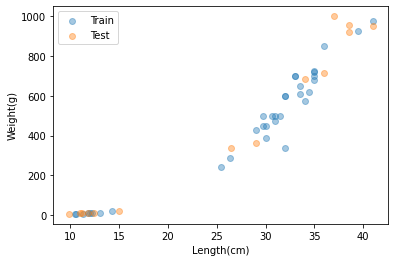

In [ ]:
# 훈련 셋과 테스트 셋 시각화 # x_train, x_test 시각화 (Weight ~ Length)
plt.scatter(X_train[:,1],X_train[:,0],label='Train',alpha=0.4)
plt.scatter(X_test[:,1],X_test[:,0],label='Test', alpha=0.4)

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

### 임의 추출의 문제점

In [ ]:
species, counts = np.unique(y,return_counts=True)
print(species)
print(counts)

['Bream' 'Smelt']
[35 14]


In [ ]:
counts / 49 # 전체 샘플에서 도미와 빙어의 비율

array([0.71428571, 0.28571429])

In [ ]:
tr_species, tr_counts = np.unique(y_train,return_counts=True)
print(tr_species)
print(tr_counts)

['Bream' 'Smelt']
[27  8]


In [ ]:
tr_counts / 35 # 훈련 레이블에서 도미와 빙어의 비율

array([0.77142857, 0.22857143])

In [ ]:
te_species, te_counts = np.unique(y_test, return_counts=True)
print(te_species)
print(te_counts)

['Bream' 'Smelt']
[8 6]


In [ ]:
te_counts / 14 #테스트 레이블에서 도미와 빙어의 비율
# 비율로 따지면 테스트레이블에선 도미 빙어비율이 7:3이여야 하는데, 빙어의 비율이 더 많이 나옴

array([0.57142857, 0.42857143])

* 임의 추출에서는 전체 샘플에서 각 클래스 (도미,빙어)의 비율이 훈련 셋과 테스트 셋에서 유지되지 않을 수도 있음. 

* 그런경우, 머신 러닝 모델의 성능이 안 좋아질 수 있음.

* 전체 샘플에서 각 클래스의 비율들이 훈련 셋과 테스트 셋에서도 비슷하게 유지되도록 샘플링 하는것이 가장 중요! 

* => 그래서 나온 방법이 층화추출 

## 층화추출 (stratified sampling)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, #30%, 훈련셋은 자동으로 70%
                                                    stratify=y,
                                                    random_state=1,
                                                    shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [ ]:
y_train.shape, y_test.shape

((34,), (15,))

In [ ]:
# 훈련 셋의 타겟 비율
tr_species, tr_counts = np.unique(y_train, return_counts=True)
print(tr_species)
print(tr_counts)

['Bream' 'Smelt']
[24 10]


In [ ]:
tr_counts/34

array([0.70588235, 0.29411765])

In [ ]:
# 테스트 셋의 타겟 비율
te_species, te_counts = np.unique(y_test, return_counts=True)
print(te_species)
print(te_counts)

['Bream' 'Smelt']
[11  4]


In [ ]:
te_counts/15

array([0.73333333, 0.26666667])

* `train_test_split` 함수 파라미터 설명

* train_size: 훈련 셋의 개수(비율), test_size: 테스트 셋의 개수(비율)
 * X, y : 훈련/테스트로 나눌 배열들.
 * train_size 또는 test_size 중 하나만 값(argument)을 전달하면 다른 하나는 자동으로 계산됨.
 * 정수로 값을 전달한 경우는 훈련(테스트) 셋의 샘플 개수를 의미.
 * 0 ~ 1 사이의 실수로 값을 전달한 경우에는, 전체 샘플 중 훈련(테스트) 셋의 비율을 의미.
* stratify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) **1차원 배열**.
* random_state: 난수 생성 seed 설정.
* shuffle: 샘플들을 섞을 지 말 지를 결정. 기본값은 True.

### 층화 추출 샘플에서 kNN 훈련,평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련


KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train) # 훈련 셋에서의 정확도
train_acc

1.0

In [ ]:
knn.score(X_test,y_test) #테스트 셋에서의 정확도

1.0

# 분류모델 평가지표

In [ ]:
test_pred = knn.predict(X_test) #테스트 셋의 예측값
confusion_matrix(y_test, test_pred) #테스트 레이블, 테스트셋에서의 오차(혼동) 행렬

array([[11,  0],
       [ 0,  4]])

**Confusion Matrix(오차/혼돈/혼동 행렬)**

* 용어 정리

 * TP(True Positive, 진짜 양성): 실제로 양성인 것을 양성으로 맞게 예측한 것.
 * FN(False Negative, 가짜 음성): 실제로 양성인 것을 음성으로 틀리게 예측한 것.
 * FP(False Positive, 가짜 양성): 실제로 음성인 것을 양성으로 틀리게 예측한 것.
 * TN(True Negative, 진짜 음성): 실제로 음성인 것은 음성으로 맞게 예측한 것.

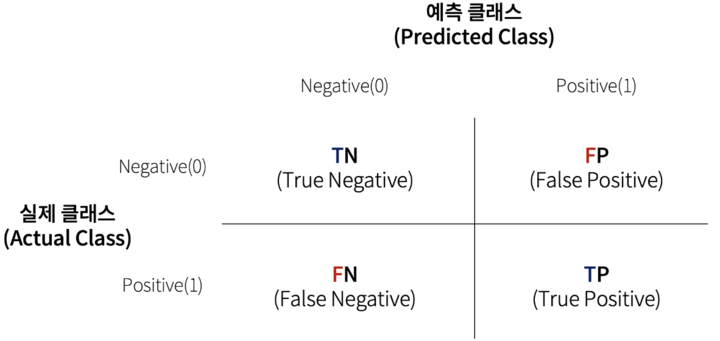
* 정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플에서 정답의 비율.

 * accuracy = (TP + TN) / (TP + FN + FP + TN)

* 정밀도(precision): 양성 예측들 중에서 정답의 비율. 양성으로 예측한 샘플들 중에서 양성으로 맞게 예측한 샘플들의 비율.

 * precision = TP / (TP + FP)

* 재현율(recall): 실제 양성 샘플들 중에서 정답의 비율. 실제로 양성인 샘플들 중에서 양성으로 맞게 예측한 샘플들의 비율.

 * recall = TP / (TP + FN)

* F1-score: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)

 * f1-score = 2 / (1/precision) + (1/recall))

* 정밀도 높이는것은 FP를 높인다

In [ ]:
clf_report = classification_report(y_test, test_pred)
print(clf_report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
precision_score(y_test, test_pred, pos_label='Bream')
# pos_label : positive(양성)로 취급할 레이블

1.0

In [ ]:
precision_score(y_test, test_pred, pos_label='Smelt')

1.0

# 특성 스케일링(feature scaling)

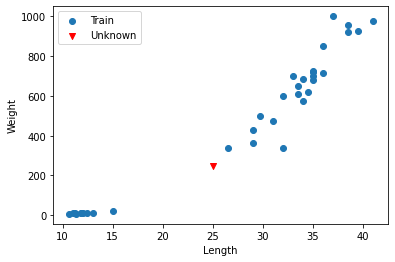

In [ ]:
# 훈련 셋(X_train)을 시각화
plt.scatter(X_train[:,1], X_train[:,0], label='Train')

#가상의 물고기 데이터(250g,25cm)
unknown = [[150,25]]
plt.scatter(25,250, label='Unknown', marker='v', color='r')


plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
# 가상의 물고기의 예측값
knn.predict(unknown) #2차원배열을 넘겨라

array(['Smelt'], dtype=object)

In [ ]:
# 가상의 물고기에서 가장 가까운 (훈련 셋) 이웃 5개의 인덱스.
neighbor_index = knn.kneighbors(unknown, return_distance=False)
neighbor_index

array([[ 7,  5, 15, 26,  2]])

In [ ]:
# 가상의 물고기에서 가장 가까운 이웃 5개의 레이블.
y_train[neighbor_index[0]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

* 생선의 두 특성(길이, 무게)는 서로 단위(cm, g)가 다르기 때문에, 값의 범위도 매우 다름.
 * 길이 범위: 0 ~ 50 cm, 무게 범위: 0 ~ 1,000 g
 * 특성(변수)들의 스케일이 다름!
 * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 길이가 거리에 미치는 영향은 생선의 무게가  거리에 미치는 영향에 비해 작음.
 * 예측을 할 때 거리 계산에 영향이 적은 변수(특성)는 무시되기 쉬움.
 * 예측 결과가 부정확해 질 수 있음.
 * 따라서, 모든 특성(변수)들이 거리 계산에 비슷한 영향을 미칠 수 있도록 스케일을 변환할 필요가 있음.
* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는, 모델을 훈련하기 전에 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
 * 표준화(standardization): 훈련 셋의 평균과 표준편차를 사용해서, 평균이 0이 되고 표준편차가 1이 되도록 스케일을 변환하는 것.
 * 정규화(normalization): 훈련 셋의 최솟값과 최댓값을 사용해서, 최솟값은 0이 되고 최댓값은 1이 되도록 스케일을 변환하는 것.

## 표준화

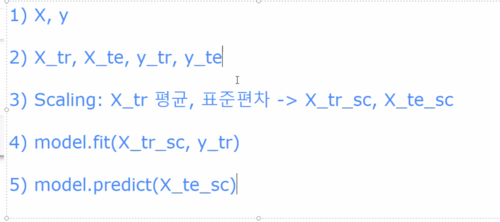

### 스케일러 생성과 훈련/테스트셋 스케일링

In [ ]:
std_scaler = StandardScaler() # 표준화 특성 스케일 변환기 생성

In [ ]:
std_scaler.fit(X_train) #훈련 셋의 평균과 표준편차를 찾는 과정.
#훈련셋만 넣는다.

StandardScaler()

In [ ]:
std_scaler.mean_ #> [X_train Weight 평균, X_train Length 평균]
#mean_ = 훈련을 끝마쳤다

array([475.36470588,  27.59705882])

In [ ]:
std_scaler.var_ #> [X_train Weight 분산, X_train Length 분산]

array([1.16589375e+05, 1.10007344e+02])

In [ ]:
X_train_std = std_scaler.transform(X_train) #훈련 셋을 표준화

In [ ]:
X_train[:5]

array([[  8.7,  11.3],
       [500. ,  29.7],
       [  9.9,  11.8],
       [850. ,  36. ],
       [  7. ,  10.6]])

In [ ]:
X_train_std[:5] #표준화완료

array([[-1.36670716, -1.55381172],
       [ 0.07214866,  0.20050088],
       [-1.36319275, -1.50614018],
       [ 1.09718333,  0.80116226],
       [-1.3716859 , -1.62055187]])

In [ ]:
X_test_std = std_scaler.transform(X_test) 
# 훈련셋에서 찾은 평균과 표준편차를 사용해서 테스트 셋을 표준화 스케일링
# 테스트셋에서는 fit을 하지 않는다.

In [ ]:
X_test[:5]

array([[  6.7,   9.8],
       [ 19.7,  14.3],
       [  7.5,  10.5],
       [600. ,  32. ],
       [500. ,  31.5]])

In [ ]:
X_test_std[:5]

array([[-1.3725645 , -1.69682633],
       [-1.33449178, -1.26778249],
       [-1.37022156, -1.63008618],
       [ 0.36501571,  0.41978996],
       [ 0.07214866,  0.37211842]])

* 표준화 (스케일링)과정

* scaler = StandardScaler()
* scaler.fit(X_train)
* scaler.transform(X_train)
 * scaler.fit_transform(X_train) 위 두개의 코드를 하나로 합친것
* scaler.transform(X_test)

In [ ]:
std_scaler2 = StandardScaler()
std_scaler2.fit_transform(X_train)
# (1) std_scaler.fit(X_train)
# (2) std_sclaer.transform(X_train)
std_scaler2.mean_
std_scaler2.var_
std_scaler2.transform(X_test)
# fit_transform() 메서드는 훈련 데이터셋에서만 사용해야함.
# 테스트 셋에서는 transform() 메서드만 사용해야함.

array([[-1.3725645 , -1.69682633],
       [-1.33449178, -1.26778249],
       [-1.37022156, -1.63008618],
       [ 0.36501571,  0.41978996],
       [ 0.07214866,  0.37211842],
       [-0.68344833, -0.20947435],
       [-1.35645681, -1.46800295],
       [ 1.39005038,  1.27787764],
       [-0.07428487,  0.2291038 ],
       [ 0.07214866,  0.32444688],
       [-0.54287215, -0.12366558],
       [-0.2500051 ,  0.2291038 ],
       [ 0.07214866,  0.29584396],
       [-0.07428487,  0.20050088],
       [ 0.65788276,  0.51513303]])

scikit-learn 클래스:

* 예측기(Estimator)
 * 머신 러닝 모델: e.g.KNeighborsClassifier
 * 생성자 호출 --> fit(훈련 셋) --> predict : 예측
* 변환기(Transformer)
 * 전처리: e.g. StandardScaler
 * 생성자 호출 --> fit(훈련 셋) --> transform : 변환

### 스케일링 된 훈련 셋으로 모델 훈련

In [ ]:
knn = KNeighborsClassifier() # knn 모델 생성

In [ ]:
knn.fit(X_train_std,y_train) # 표준화 된 훈련셋으로 모델 훈련

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train_std) #스케일링된 훈련셋의 예측값
train_pred

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
test_predict = knn.predict(X_test_std) #스케일링된 테스트셋의 예측값
test_predict

array(['Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [ ]:
#score는 예측값과 실제값을 비교할 때 정확도를 검사해주는 것
knn.score(X_test_std,y_test) # 이때는 y(실제값)의 인수를 사용해주는 것

1.0

In [ ]:
knn.score(X_train_std,y_train)

1.0

In [ ]:
# 150g, 25cm인 가상의 물고기의 스케일 변환
unknown_std = std_scaler.transform(unknown)
unknown_std

array([[-0.95288602, -0.24761158]])

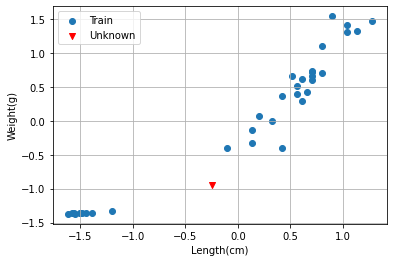

In [ ]:
#표준화 스케일링이 끝난 훈련셋 시각화
plt.scatter(X_train_std[:,1],X_train_std[:,0], label='Train')
#표준화 스케일링이 끝난 가상의 물고기 시각화
plt.scatter(unknown_std[:,1],unknown_std[:,0], label='Unknown', 
            marker='v', color='r')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 스케일 변환된 가상의 물고기 데이터의 가장 가까운 이웃 5개를 찾아라
neighbor_index = knn.kneighbors(unknown_std, return_distance=False)
neighbor_index

array([[20, 13, 11, 23,  7]])

In [ ]:
# 가장 가까운 이웃들의 레이블
y_train[neighbor_index[0]]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [ ]:
knn.predict(unknown_std)

array(['Bream'], dtype=object)

## 정규화. Min-Max Scaling.

* Min-Max Scaler 객체 생성
* 훈련 셋의 최솟값과 최댓값을 찾아서, 훈련 셋과 테스트 셋의 스케일을 변환
* KNN 분류기 객체 생성
* 모델 훈련
* 훈련 셋 예측값, 정확도
* 테스트 셋 예측값, 정확도
* (150g, 25cm) 가상의 물고기 데이터를 min-max scaling.
 * 스케일 변환된 훈련 셋과 가상의 물고기 데이터를 시각화.
 * 가상의 물고기의 예측값.

In [ ]:
# X : 특성 행렬(feature matrix), y: 타겟 배열(target array)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.3,
                                          random_state=1,
                                          stratify=y)

In [ ]:
#min-max sclaer 객체 생성
norm_scaler = MinMaxScaler()

In [ ]:
# 훈련 셋과 테스트 셋의 스케일을 변환
sclaer_minmax_train = norm_scaler.fit_transform(X_train)

In [ ]:
# 훈련 셋의 최솟값과 최댓값을 찾기
norm_scaler.data_max_
# MinMaxSclaer에서의 최댓값은 .data_max_

array([1000.,   41.])

In [ ]:
# 최솟값을 찾기
norm_scaler.data_min_
# MinMaxSclaer에서의 최솟값은 .data_min_

array([ 7. , 10.6])

In [ ]:
sclaer_minmax_train[:5] #스케일링 완료된 상태의 5행을 찾아본다.

array([[0.00171198, 0.02302632],
       [0.49647533, 0.62828947],
       [0.00292044, 0.03947368],
       [0.8489426 , 0.83552632],
       [0.        , 0.        ]])

In [ ]:
# 테스트셋은 transform만 가능
sclaer_minmax_test = norm_scaler.transform(X_test)

**--스케일링 모두 완료된 상태--**

In [ ]:
#knn 분류기 객체 생성
knn = KNeighborsClassifier()

In [ ]:
# 정규화를 한 훈련 셋으로 모델을 훈련
knn.fit(sclaer_minmax_train,y_train)

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(sclaer_minmax_train) #훈련 셋의 예측값
train_pred

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# 훈련셋 정확도 -knn이 갖고있는 메서드 함수
knn.score(sclaer_minmax_train,y_train)

1.0

In [ ]:
# 훈련셋 정확도 (2) -sklearn이 가지고 있는 메서드
accuracy_score(y_train,train_pred)

1.0

In [ ]:
test_pred = knn.predict(sclaer_minmax_test) #테스트셋의 예측값
test_pred

array(['Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [ ]:
# 테스트셋 정확도
knn.score(sclaer_minmax_test,y_test)

1.0

In [ ]:
# 테스트셋 정확도(2)
accuracy_score(y_test, test_pred)

1.0

In [ ]:
# 150g, 25cm인 가상의 물고기의 스케일 변환
unknown_minmax = norm_scaler.transform(unknown)
unknown_minmax

array([[0.14400806, 0.47368421]])

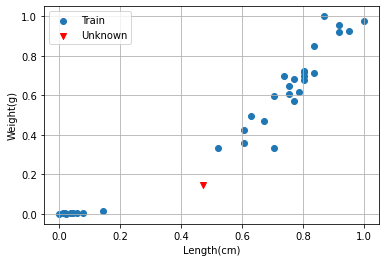

In [ ]:
#정규화 스케일링이 끝난 훈련셋 시각화
plt.scatter(sclaer_minmax_train[:,1],sclaer_minmax_train[:,0], label='Train')
#정규화 스케일링이 끝난 가상의 물고기 시각화
plt.scatter(unknown_minmax[:,1],unknown_minmax[:,0], label='Unknown', 
            marker='v', color='r')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 가상의 물고기에서 가장 가까운 이웃 5개의 인덱스
neighbor_index = knn.kneighbors(unknown_minmax, return_distance=False)
neighbor_index

array([[20, 13, 11, 23,  7]])

In [ ]:
# 가상의 물고기의 가장 가까운 이웃들의 레이블
y_tr[neighbor_index[0]]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [ ]:
knn.predict(unknown_minmax)

array(['Bream'], dtype=object)